# Monetary Inflation Data Analysis using FRED

## An analysis on the impact of monetary inflation in the United States.

This project aims to utilize the Federal Reserve Economic Data (FRED) to answer the following questions:  

    1. Which states were the most impacted by monetary inflation?  
    2. Was each economic sector equally effected by inflation? Or were some sectors more effected than others?  
    3. Which income brackets were most affected by inflation?
    
To accomplish this we will need to utilize the following skills:

    -Data wrangling
    -Data cleaning
    -API utilization
    -Data exploration
    -Data analysis

## 1. Importing libraries and configuring settings

In [1]:
# Importing the libraries we will be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred
import config

C:\Users\rmalv\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Setting the styles and settings for our data
plt.style.use('fivethirtyeight')
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 500
pd.set_option('display.max_colwidth', 100)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
# Your FRED API key goes here
api_key = config.api_key # Your API key goes here

## 2. Creating a FRED object

In [4]:
fred = Fred(api_key=api_key)

## 3. Searching through the FRED database to gather our data

In [8]:
CPI_search = fred.search('Consumer Price Index',\
                         order_by='popularity', filter=('frequency', 'Monthly'), limit=3000)
CPI_search.head()

id realtime_start realtime_end  \
series id                                                                
CPIAUCSL                          CPIAUCSL     2023-09-18   2023-09-18   
CORESTICKM159SFRBATL  CORESTICKM159SFRBATL     2023-09-18   2023-09-18   
CPILFESL                          CPILFESL     2023-09-18   2023-09-18   
CUSR0000SETA02              CUSR0000SETA02     2023-09-18   2023-09-18   
APU0000708111                APU0000708111     2023-09-18   2023-09-18   

                                                                                                                  title  \
series id                                                                                                                 
CPIAUCSL                                   Consumer Price Index for All Urban Consumers: All Items in U.S. City Average   
CORESTICKM159SFRBATL                                             Sticky Price Consumer Price Index less Food and Energy   
CPILFESL              Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average   
CUSR0000SETA02                  Consumer Price Index for All Urban Consumers: Used Cars and Trucks in U.S. City Average   
APU0000708111                                 Average Price: Eggs, Grade A, Large (Cost per Dozen) in U.S. City Average   

                     observation_start observation_end frequency  \
series id                                                          
CPIAUCSL                    1947-01-01      2023-08-01   Monthly   
CORESTICKM159SFRBATL        1967-12-01      2023-08-01   Monthly   
CPILFESL                    1957-01-01      2023-08-01   Monthly   
CUSR0000SETA02              1953-01-01      2023-08-01   Monthly   
APU0000708111               1980-01-01      2023-08-01   Monthly   

                     frequency_short                         units  \
series id                                                            
CPIAUCSL                           M           Index 1982-1984=100   
CORESTICKM159SFRBATL               M  Percent Change from Year Ago   
CPILFESL                           M           Index 1982-1984=100   
CUSR0000SETA02                     M           Index 1982-1984=100   
APU0000708111                      M                  U.S. Dollars   

                              units_short      seasonal_adjustment  \
series id                                                            
CPIAUCSL              Index 1982-1984=100      Seasonally Adjusted   
CORESTICKM159SFRBATL  % Chg. from Yr. Ago      Seasonally Adjusted   
CPILFESL              Index 1982-1984=100      Seasonally Adjusted   
CUSR0000SETA02        Index 1982-1984=100      Seasonally Adjusted   
APU0000708111                      U.S. $  Not Seasonally Adjusted   

                     seasonal_adjustment_short               last_updated  \
series id                                                                   
CPIAUCSL                                    SA  2023-09-13 07:42:02-05:00   
CORESTICKM159SFRBATL                        SA  2023-09-13 12:01:01-05:00   
CPILFESL                                    SA  2023-09-13 07:41:03-05:00   
CUSR0000SETA02                              SA  2023-09-13 07:41:02-05:00   
APU0000708111                              NSA  2023-09-13 07:37:01-05:00   

                     popularity  \
series id                         
CPIAUCSL                     96   
CORESTICKM159SFRBATL         85   
CPILFESL                     82   
CUSR0000SETA02               81   
APU0000708111                80   

                                                                                                                    notes  
series id                                                                                                                  
CPIAUCSL              The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a price index of a bas...  
CORESTICKM159SFRBATL  The Sticky Price Con

## 4. Pull raw data and plot

In [9]:
# Let's start by taking a look at the most popular consumer index:
# Consumer Price Index for All Urban Consumers: All Items in U.S City Average

cpi_urban = fred.get_series('CPIAUCSL', observation_start="2015-01-01")
print(cpi_urban.head())
print('')
print(cpi_urban.tail())

2000-01-01    169.3
2000-02-01    170.0
2000-03-01    171.0
2000-04-01    170.9
2000-05-01    171.2
dtype: float64

2023-04-01    302.918
2023-05-01    303.294
2023-06-01    303.841
2023-07-01    304.348
2023-08-01    306.269
dtype: float64


<AxesSubplot:title={'center':'CPI for Urban Consumers: All Items in U.S City Average'}>

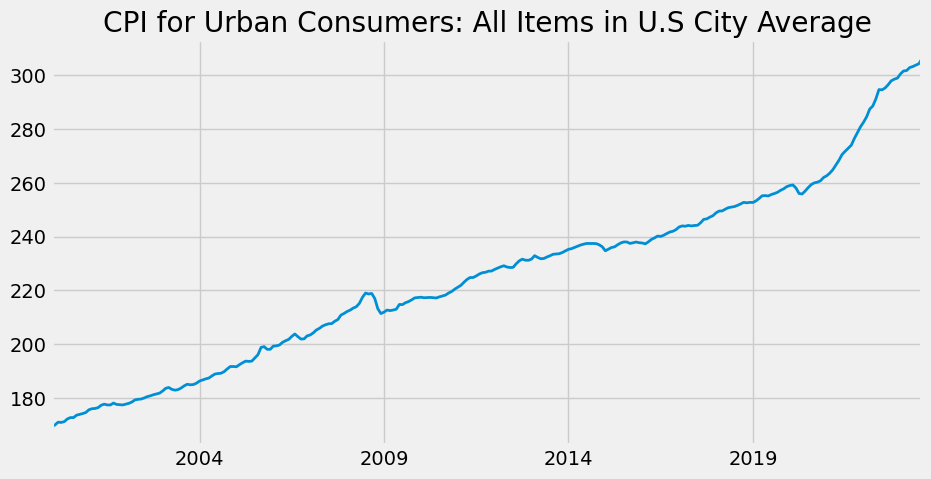

In [10]:
cpi_urban.plot(figsize=(10,5), lw=2, title='CPI for Urban Consumers: All Items in U.S City Average')

It looks like we can sucessfully pull the data we need and plot it. Let's now expand our data set to include the CPI of multiple items, not just the overall.

## 5. Pull and multiple data series

Let's pull together all of the different goods and services indices available to us on FRED. We will start by removing the search results that are not relevant to our project.

In [11]:
CPI_search = CPI_search.query('seasonal_adjustment == "Seasonally Adjusted"')
CPI_search = CPI_search.loc[CPI_search['title'].str\
                            .contains('Consumer Price Index for All Urban Consumers:')]
CPI_search

id realtime_start realtime_end  \
series id                                                      
CPIAUCSL                CPIAUCSL     2023-09-18   2023-09-18   
CPILFESL                CPILFESL     2023-09-18   2023-09-18   
CUSR0000SETA02    CUSR0000SETA02     2023-09-18   2023-09-18   
CUSR0000SAH1        CUSR0000SAH1     2023-09-18   2023-09-18   
CPIUFDSL                CPIUFDSL     2023-09-18   2023-09-18   
CUSR0000SAF11      CUSR0000SAF11     2023-09-18   2023-09-18   
CPIENGSL                CPIENGSL     2023-09-18   2023-09-18   
CUSR0000SASLE      CUSR0000SASLE     2023-09-18   2023-09-18   
CPIAPPSL                CPIAPPSL     2023-09-18   2023-09-18   
CUSR0000SETA01    CUSR0000SETA01     2023-09-18   2023-09-18   
CUSR0000SAM2        CUSR0000SAM2     2023-09-18   2023-09-18   
CUSR0000SETB01    CUSR0000SETB01     2023-09-18   2023-09-18   
CUSR0000SEHF01    CUSR0000SEHF01     2023-09-18   2023-09-18   
CUSR0000SEFV        CUSR0000SEFV     2023-09-18   2023-09-18   
CUSR0000SETG01    CUSR0000SETG01     2023-09-18   2023-09-18   
CUSR0000SEHA        CUSR0000SEHA     2023-09-18   2023-09-18   
CUSR0000SAM1        CUSR0000SAM1     2023-09-18   2023-09-18   
CPIEDUSL                CPIEDUSL     2023-09-18   2023-09-18   
CPIMEDSL                CPIMEDSL     2023-09-18   2023-09-18   
CUSR0000SEHC        CUSR0000SEHC     2023-09-18   2023-09-18   
CPIFABSL                CPIFABSL     2023-09-18   2023-09-18   
CUSR0000SAD          CUSR0000SAD     2023-09-18   2023-09-18   
CPIHOSSL                CPIHOSSL     2023-09-18   2023-09-18   
CUSR0000SETD        CUSR0000SETD     2023-09-18   2023-09-18   
CUSR0000SEGD03    CUSR0000SEGD03     2023-09-18   2023-09-18   
CUSR0000SAS2RS    CUSR0000SAS2RS     2023-09-18   2023-09-18   
CPITRNSL                CPITRNSL     2023-09-18   2023-09-18   
CUSR0000SEHG        CUSR0000SEHG     2023-09-18   2023-09-18   
CUSR0000SA0L2      CUSR0000SA0L2     2023-09-18   2023-09-18   
CUSR0000SETA        CUSR0000SETA     2023-09-18   2023-09-18   
CUSR0000SAF112    CUSR0000SAF112     2023-09-18   2023-09-18   
CUSR0000SACL1E    CUSR0000SACL1E     2023-09-18   2023-09-18   
CUSR0000SAS          CUSR0000SAS     2023-09-18   2023-09-18   
CUSR0000SEEB        CUSR0000SEEB     2023-09-18   2023-09-18   
CUSR0000SAN          CUSR0000SAN     2023-09-18   2023-09-18   
CUSR0000SEHE        CUSR0000SEHE     2023-09-18   2023-09-18   
CUSR0000SASL2RS  CUSR0000SASL2RS     2023-09-18   2023-09-18   
CUSR0000SAF116    CUSR0000SAF116     2023-09-18   2023-09-18   
CUSR0000SEEE        CUSR0000SEEE     2023-09-18   2023-09-18   
CUSR0000SAF113    CUSR0000SAF113     2023-09-18   2023-09-18   
CPIRECSL                CPIRECSL     2023-09-18   2023-09-18   
CUSR0000SEEE01    CUSR0000SEEE01     2023-09-18   2023-09-18   
CUSR0000SAC          CUSR0000SAC     2023-09-18   2023-09-18   
CUSR0000SS62031  CUSR0000SS62031     2023-09-18   2023-09-18   
CUSR0000SEHC01    CUSR0000SEHC01     2023-09-18   2023-09-18   
CUSR0000SEHF02    CUSR0000SEHF02     2023-09-18   2023-09-18   
CUSR0000SEFP01    CUSR0000SEFP01     2023-09-18   2023-09-18   
CUSR0000SAF111    CUSR0000SAF111     2023-09-18   2023-09-18   
CUSR0000SEHB        CUSR0000SEHB     2023-09-18   2023-09-18   
CUSR0000SETB        CUSR0000SETB     2023-09-18   2023-09-18   
CUSR0000SETC        CUSR0000SETC     2023-09-18   2023-09-18   
CUSR0000SEHF        CUSR0000SEHF     2023-09-18   2023-09-18   
CUSR0000SAH3        CUSR0000SAH3     2023-09-18   2023-09-18   
CUSR0000SAS4        CUSR0000SAS4     2023-09-18   2023-09-18   
CPILEGSL                CPILEGSL     2023-09-18   2023-09-18   
CUSR0000SEEA        CUSR0000SEEA     2023-09-18   2023-09-18   
CUSR0000SEMC        CUSR0000SEMC     2023-09-18   2023-09-18   
CPIOGSSL                CPIOGSSL     2023-09-18   2023-09-18   
CUSR0000SAH2        CUSR0000SAH2     2023-09-18   2023-09-18   
CUSR0000SEMD        CUSR0000SEMD     2023-09-18   2023-09-18   
CPIULFSL                CPIULFSL     2023-09-18   2023-09-18  

Perfect! It looks like we managed to pull many different goods and services.

In [12]:
# Let's add a new column that removes the redundant information
# This new column will contain just the goods or service 

new_title = CPI_search['title'].str.replace('Consumer Price Index for All Urban Consumers:', '')
new_title = new_title.str.replace('in U.S. City Average', '')
CPI_search['cpi_item'] = new_title
CPI_search

C:\Users\rmalv\AppData\Local\Temp\ipykernel_16420\2812450957.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  new_title = new_title.str.replace('in U.S. City Average', '')


id realtime_start realtime_end  \
series id                                                      
CPIAUCSL                CPIAUCSL     2023-09-18   2023-09-18   
CPILFESL                CPILFESL     2023-09-18   2023-09-18   
CUSR0000SETA02    CUSR0000SETA02     2023-09-18   2023-09-18   
CUSR0000SAH1        CUSR0000SAH1     2023-09-18   2023-09-18   
CPIUFDSL                CPIUFDSL     2023-09-18   2023-09-18   
CUSR0000SAF11      CUSR0000SAF11     2023-09-18   2023-09-18   
CPIENGSL                CPIENGSL     2023-09-18   2023-09-18   
CUSR0000SASLE      CUSR0000SASLE     2023-09-18   2023-09-18   
CPIAPPSL                CPIAPPSL     2023-09-18   2023-09-18   
CUSR0000SETA01    CUSR0000SETA01     2023-09-18   2023-09-18   
CUSR0000SAM2        CUSR0000SAM2     2023-09-18   2023-09-18   
CUSR0000SETB01    CUSR0000SETB01     2023-09-18   2023-09-18   
CUSR0000SEHF01    CUSR0000SEHF01     2023-09-18   2023-09-18   
CUSR0000SEFV        CUSR0000SEFV     2023-09-18   2023-09-18   
CUSR0000SETG01    CUSR0000SETG01     2023-09-18   2023-09-18   
CUSR0000SEHA        CUSR0000SEHA     2023-09-18   2023-09-18   
CUSR0000SAM1        CUSR0000SAM1     2023-09-18   2023-09-18   
CPIEDUSL                CPIEDUSL     2023-09-18   2023-09-18   
CPIMEDSL                CPIMEDSL     2023-09-18   2023-09-18   
CUSR0000SEHC        CUSR0000SEHC     2023-09-18   2023-09-18   
CPIFABSL                CPIFABSL     2023-09-18   2023-09-18   
CUSR0000SAD          CUSR0000SAD     2023-09-18   2023-09-18   
CPIHOSSL                CPIHOSSL     2023-09-18   2023-09-18   
CUSR0000SETD        CUSR0000SETD     2023-09-18   2023-09-18   
CUSR0000SEGD03    CUSR0000SEGD03     2023-09-18   2023-09-18   
CUSR0000SAS2RS    CUSR0000SAS2RS     2023-09-18   2023-09-18   
CPITRNSL                CPITRNSL     2023-09-18   2023-09-18   
CUSR0000SEHG        CUSR0000SEHG     2023-09-18   2023-09-18   
CUSR0000SA0L2      CUSR0000SA0L2     2023-09-18   2023-09-18   
CUSR0000SETA        CUSR0000SETA     2023-09-18   2023-09-18   
CUSR0000SAF112    CUSR0000SAF112     2023-09-18   2023-09-18   
CUSR0000SACL1E    CUSR0000SACL1E     2023-09-18   2023-09-18   
CUSR0000SAS          CUSR0000SAS     2023-09-18   2023-09-18   
CUSR0000SEEB        CUSR0000SEEB     2023-09-18   2023-09-18   
CUSR0000SAN          CUSR0000SAN     2023-09-18   2023-09-18   
CUSR0000SEHE        CUSR0000SEHE     2023-09-18   2023-09-18   
CUSR0000SASL2RS  CUSR0000SASL2RS     2023-09-18   2023-09-18   
CUSR0000SAF116    CUSR0000SAF116     2023-09-18   2023-09-18   
CUSR0000SEEE        CUSR0000SEEE     2023-09-18   2023-09-18   
CUSR0000SAF113    CUSR0000SAF113     2023-09-18   2023-09-18   
CPIRECSL                CPIRECSL     2023-09-18   2023-09-18   
CUSR0000SEEE01    CUSR0000SEEE01     2023-09-18   2023-09-18   
CUSR0000SAC          CUSR0000SAC     2023-09-18   2023-09-18   
CUSR0000SS62031  CUSR0000SS62031     2023-09-18   2023-09-18   
CUSR0000SEHC01    CUSR0000SEHC01     2023-09-18   2023-09-18   
CUSR0000SEHF02    CUSR0000SEHF02     2023-09-18   2023-09-18   
CUSR0000SEFP01    CUSR0000SEFP01     2023-09-18   2023-09-18   
CUSR0000SAF111    CUSR0000SAF111     2023-09-18   2023-09-18   
CUSR0000SEHB        CUSR0000SEHB     2023-09-18   2023-09-18   
CUSR0000SETB        CUSR0000SETB     2023-09-18   2023-09-18   
CUSR0000SETC        CUSR0000SETC     2023-09-18   2023-09-18   
CUSR0000SEHF        CUSR0000SEHF     2023-09-18   2023-09-18   
CUSR0000SAH3        CUSR0000SAH3     2023-09-18   2023-09-18   
CUSR0000SAS4        CUSR0000SAS4     2023-09-18   2023-09-18   
CPILEGSL                CPILEGSL     2023-09-18   2023-09-18   
CUSR0000SEEA        CUSR0000SEEA     2023-09-18   2023-09-18   
CUSR0000SEMC        CUSR0000SEMC     2023-09-18   2023-09-18   
CPIOGSSL                CPIOGSSL     2023-09-18   2023-09-18   
CUSR0000SAH2        CUSR0000SAH2     2023-09-18   2023-09-18   
CUSR0000SEMD        CUSR0000SEMD     2023-09-18   2023-09-18   
CPIULFSL                CPIULFSL     2023-09-18   2023-09-18  

In [13]:
# Let's also create a dictionary to map the series id index to readable names. We will use this later.
series_id_to_cpi_item = CPI_search['cpi_item'].to_dict()

First, let's loop through each search result and join them together using fred.get_series()

In [14]:
all_results = []

for series_id in CPI_search.index:
    cpi_result = fred.get_series(series_id, observation_start='2015-01-01')
    cpi_result = cpi_result.to_frame(name=series_id)
    all_results.append(cpi_result)
cpi_df = pd.concat(all_results, axis=1)

In [15]:
cpi_df

CPIAUCSL  CPILFESL  CUSR0000SETA02  CUSR0000SAH1  CPIUFDSL  \
2000-01-01   169.300   179.300         153.900       190.600   165.600   
2000-02-01   170.000   179.400         153.000       190.900   166.200   
2000-03-01   171.000   180.000         153.000       191.600   166.500   
2000-04-01   170.900   180.300         154.000       191.900   166.700   
2000-05-01   171.200   180.700         155.400       192.400   167.300   
2000-06-01   172.200   181.100         155.700       193.100   167.400   
2000-07-01   172.700   181.500         155.300       193.600   168.300   
2000-08-01   172.700   181.900         155.200       194.100   168.700   
2000-09-01   173.600   182.300         156.200       194.700   168.900   
2000-10-01   173.900   182.600         157.900       195.300   169.000   
2000-11-01   174.200   183.100         159.300       195.800   169.200   
2000-12-01   174.600   183.300         160.200       196.100   170.000   
2001-01-01   175.600   183.900         160.400       196.800   170.300   
2001-02-01   176.000   184.400         160.400       197.500   171.200   
2001-03-01   176.100   184.700         159.900       198.300   171.700   
2001-04-01   176.400   185.100         159.700       198.800   172.100   
2001-05-01   177.300   185.300         159.100       199.600   172.400   
2001-06-01   177.700   186.000         158.900       200.500   173.100   
2001-07-01   177.400   186.400         158.300       200.900   173.600   
2001-08-01   177.400   186.700         158.000       201.800   174.000   
2001-09-01   178.100   187.100         157.300       202.000   174.200   
2001-10-01   177.600   187.400         157.800       202.500   174.800   
2001-11-01   177.500   188.100         157.400       203.500   174.900   
2001-12-01   177.400   188.400         157.200       204.300   174.700   
2002-01-01   177.700   188.700         155.600       205.100   175.300   
2002-02-01   178.000   189.100         153.900       206.000   175.700   
2002-03-01   178.500   189.200         152.100       206.300   176.100   
2002-04-01   179.300   189.700         151.800       207.000   176.400   
2002-05-01   179.500   190.000         151.800       207.400   175.800   
2002-06-01   179.600   190.200         152.200       207.800   175.900   
2002-07-01   180.000   190.500         152.700       208.200   176.100   
2002-08-01   180.500   191.100         153.400       208.900   176.100   
2002-09-01   180.800   191.300         152.200       209.400   176.500   
2002-10-01   181.200   191.500         150.700       209.700   176.400   
2002-11-01   181.500   191.900         148.800       210.400   176.900   
2002-12-01   181.800   192.100         148.500       210.800   177.100   
2003-01-01   182.600   192.400         148.300       211.500   177.100   
2003-02-01   183.600   192.500         148.400       211.600   178.100   
2003-03-01   183.900   192.500         148.500       211.500   178.400   
2003-04-01   183.200   192.500         148.400       211.600   178.500   
2003-05-01   182.900   192.900         147.900       212.600   178.800   
2003-06-01   183.100   193.000         147.400       212.600   179.700   
2003-07-01   183.700   193.400         145.700       213.200   179.800   
2003-08-01   184.500   193.600         143.300       213.600   180.500   
2003-09-01   185.100   193.700         139.000       214.000   180.900   
2003-10-01   184.900   194.000         135.100       214.700   181.600   
2003-11-01   185.000   194.000         132.000       215.100   182.600   
2003-12-01   185.500   194.200         131.000       215.500   183.500   
2004-01-01   186.300   194.600         131.800       215.900   183.400   
2004-02-01   186.700   194.900         131.800       215.800   183.900   
2004-03-01   187.100   195.500         131.800       217.000   184.200   
2004-04-01   187.400   195.900         131.600       217.800   184.600   
2004-05-01   188.200   196.200         131.800       218.500   186.100   
2004-06-01   188

Nice! We've succesfully joined all 103 indices to create a new dataframe with every CPI available to us. As expected, the column names is each corresponding series id. To make it more readable, let's convert the series id to the cpi it represents.

In [16]:
cpi_df.columns = [series_id_to_cpi_item[c] for c in cpi_df.columns]
cpi_df

All Items    All Items Less Food and Energy   \
2000-01-01      169.300                           179.300   
2000-02-01      170.000                           179.400   
2000-03-01      171.000                           180.000   
2000-04-01      170.900                           180.300   
2000-05-01      171.200                           180.700   
2000-06-01      172.200                           181.100   
2000-07-01      172.700                           181.500   
2000-08-01      172.700                           181.900   
2000-09-01      173.600                           182.300   
2000-10-01      173.900                           182.600   
2000-11-01      174.200                           183.100   
2000-12-01      174.600                           183.300   
2001-01-01      175.600                           183.900   
2001-02-01      176.000                           184.400   
2001-03-01      176.100                           184.700   
2001-04-01      176.400                           185.100   
2001-05-01      177.300                           185.300   
2001-06-01      177.700                           186.000   
2001-07-01      177.400                           186.400   
2001-08-01      177.400                           186.700   
2001-09-01      178.100                           187.100   
2001-10-01      177.600                           187.400   
2001-11-01      177.500                           188.100   
2001-12-01      177.400                           188.400   
2002-01-01      177.700                           188.700   
2002-02-01      178.000                           189.100   
2002-03-01      178.500                           189.200   
2002-04-01      179.300                           189.700   
2002-05-01      179.500                           190.000   
2002-06-01      179.600                           190.200   
2002-07-01      180.000                           190.500   
2002-08-01      180.500                           191.100   
2002-09-01      180.800                           191.300   
2002-10-01      181.200                           191.500   
2002-11-01      181.500                           191.900   
2002-12-01      181.800                           192.100   
2003-01-01      182.600                           192.400   
2003-02-01      183.600                           192.500   
2003-03-01      183.900                           192.500   
2003-04-01      183.200                           192.500   
2003-05-01      182.900                           192.900   
2003-06-01      183.100                           193.000   
2003-07-01      183.700                           193.400   
2003-08-01      184.500                           193.600   
2003-09-01      185.100                           193.700   
2003-10-01      184.900                           194.000   
2003-11-01      185.000                           194.000   
2003-12-01      185.500                           194.200   
2004-01-01      186.300                           194.600   
2004-02-01      186.700                           194.900   
2004-03-01      187.100                           195.500   
2004-04-01      187.400                           195.900   
2004-05-01      188.200                           196.200   
2004-06-01      188.900                           196.600   
2004-07-01      189.100                           196.800   
2004-08-01      189.200                           196.900   
2004-09-01      189.800                           197.500   
2004-10-01      190.800                           197.900   
2004-11-01      191.700                           198.300   
2004-12-01      191.700                           198.600   
2005-01-01      191.600                           199.000   
2005-02-01      192.400                           199.400   
2005-03-01      193.100                           200.100   
2005-04-01      193.700                           200.200   
2005-05-01      193.600                         

Now that we have our data. It's important to understand what we're looking at. The BLS provides an excellent summary here: https://www.bls.gov/cpi/questions-and-answers.htm  

In short, each cell is the percent change in average pricing from a certain year, typically 1982-1984. It's important to note the base year has a value of 100. So, in January 2000, the average price of shelter had increased 90.6% since 1984.

In [27]:
print(cpi_df.iloc[0][0])
print(cpi_df.iloc[-1][0])

169.3
306.269


In [86]:
i = 0
all_percent_change = []
for value in cpi_df:
    percent_change = ((cpi_df.iloc[-1][i] / cpi_df.iloc[0][i])*100)
    all_percent_change.append(percent_change)
    i += 1

In [87]:
all_percent_change

[180.90313053750737,
 172.70552147239263,
 125.84210526315789,
 200.8300104931794,
 195.42270531400968,
 183.3103448275862,
 251.8878260869565,
 200.27510040160644,
 100.86840091813313,
 125.62851123595506,
 227.3783160322952,
 285.7178602243313,
 208.42316784869973,
 212.96830143540672,
 114.02254283137961,
 222.50304035378662,
 173.4339702760085,
 141.42495126705654,
 213.98826291079808,
 200.42500000000004,
 193.32028898254066,
 101.15163607342379,
 192.95015015015017,
 224.29512893982806,
 nan,
 201.5877016129032,
 182.52380952380952,
 276.134030418251,
 171.85135135135135,
 127.81175298804781,
 211.29407850964736,
 116.05336105336104,
 200.92604166666666,
 265.40910527979764,
 179.06774193548387,
 360.16576576576574,
 200.46153846153848,
 165.5991879350348,
 nan,
 173.9673590504451,
 133.06451612903226,
 nan,
 153.58623040218134,
 194.9020480854853,
 200.45816326530615,
 196.0909090909091,
 nan,
 191.48951048951048,
 159.2746967071057,
 285.17838765008577,
 180.3422619047619,
 210

In [88]:
percent_diff_df = pd.DataFrame(data=all_percent_change, index=cpi_df.columns, columns=['percent change since 2000'])
percent_diff_df = percent_diff_df.sort_values(by=['percent change since 2000'], ascending=False)

In [89]:
percent_diff_df

percent change since 2000
 Tobacco and Smoking Products                                                                                       384.050653
 Fuel Oil and Other Fuels                                                                                           360.165766
 Hospital and Related Services                                                                                      334.434373
 Energy Commodities                                                                                                 291.106713
 Gasoline (All Types)                                                                                               285.717860
 Motor Fuel                                                                                                         285.178388
 Water and Sewer and Trash Collection Services                                                                      276.134030
 Tuition, Other School Fees, and Childcare                                                                          265.409105
 Education                                                                                                          265.307552
 Educational Books and Supplies                                                                                     254.139773
 Energy                                                                                                             251.887826
 Fuels and Utilities                                                                                                230.602593
 Medical Care Services                                                                                              227.378316
 Motor Vehicle Maintenance and Repair                                                                               224.295129
 Rent of Primary Residence                                                                                          222.503040
 Other Food Away from Home                                                                                          221.312849
 Cable, Satellite, and Live Streaming Television Service                                                            220.902186
 Household Energy                                                                                                   218.943772
 Miscellaneous Personal Services                                                                                    215.949153
 Medical Care                                                                                                       213.988263
 Food Away from Home                                                                                                212.968301
 Meats, Poultry, Fish, and Eggs                                                                                     211.294079
 Energy Services                                                                                                    210.277138
 Fats and Oils                                                                                                      208.898098
 Electricity                                                                                                        208.423168
 Transportation Services                                                                                            207.509307
 Alcoholic Beverages Away from Home                                                                                 205.688204
 Fees for Lessons or Instructions                                                                                   204.824158
 Other Goods and Services                                                                                           204.029456
 Rent of Shelter                                                                                                    201.587702
 Services                                                                                                           200.926042
 Shelter                             

<AxesSubplot:>

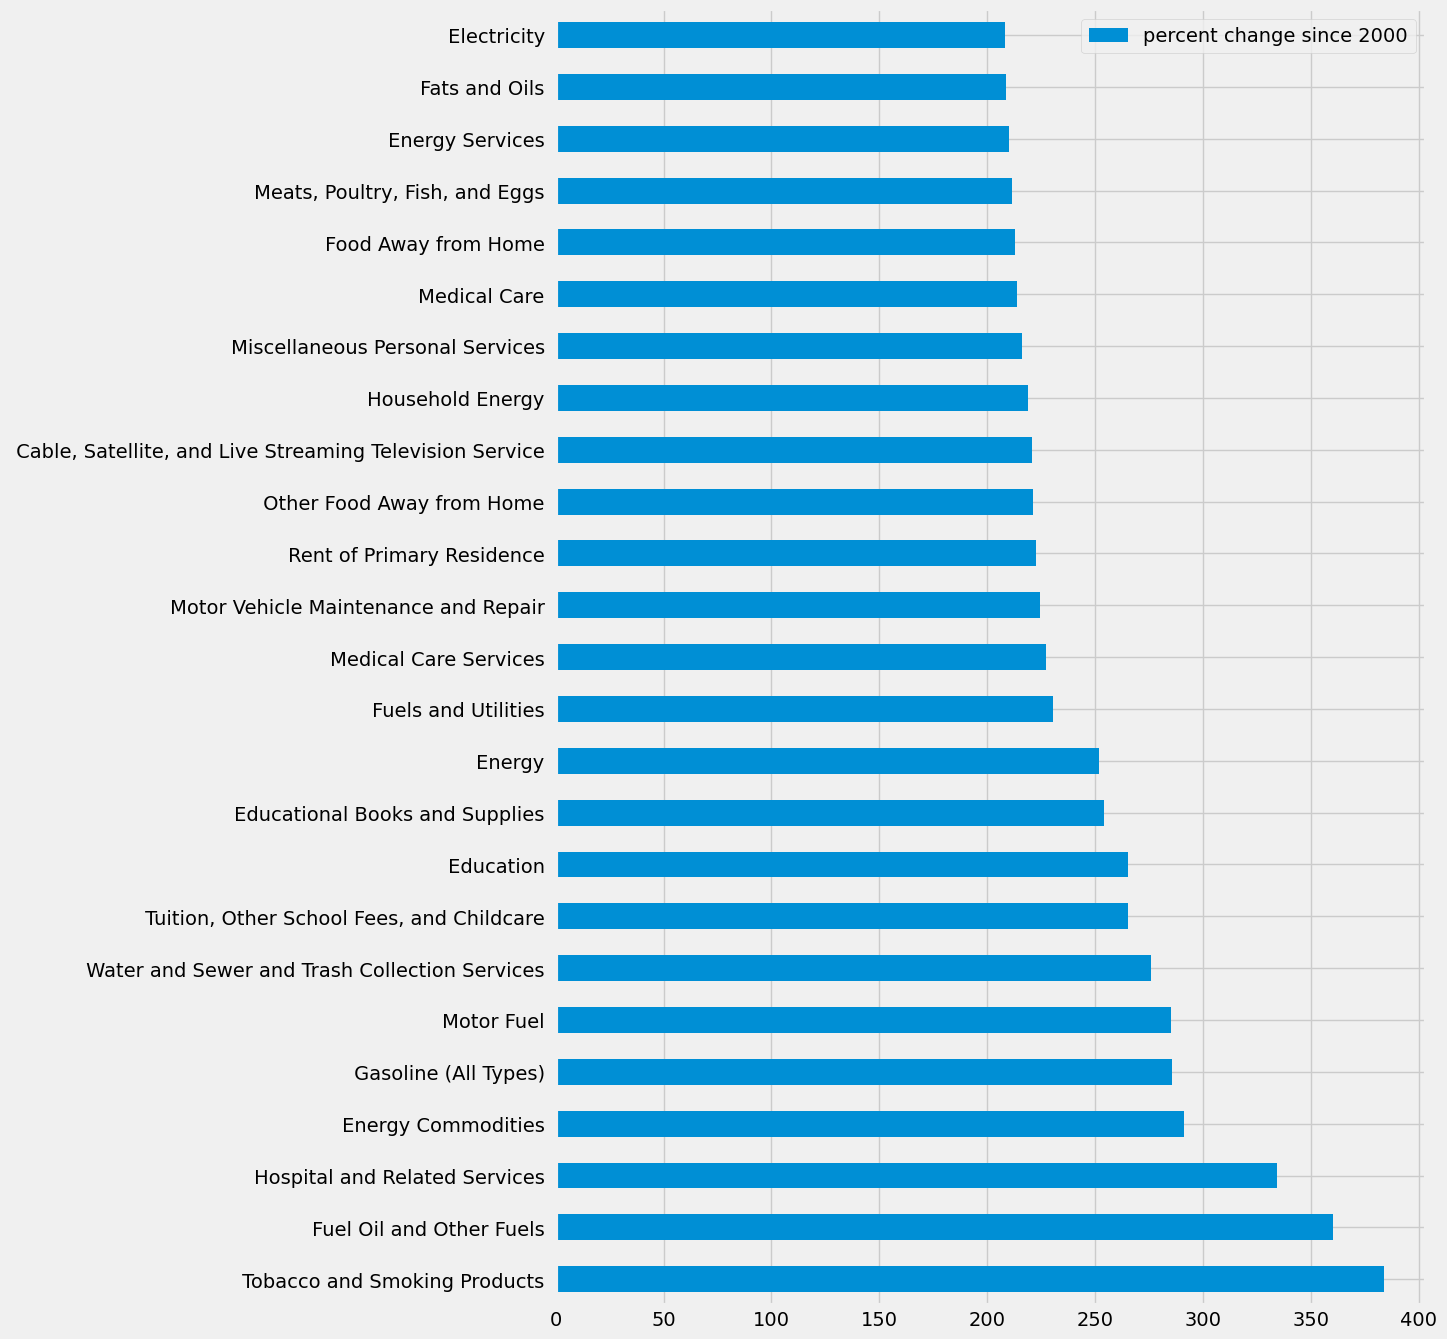

In [92]:
percent_diff_df.head(25).plot(kind='barh', figsize=[10,16], )